**Categorical Data are of two types -** 
- Nominal -- where there is no relations among the categories (One Hot Encoding)
- Ordinal -- Where order exists among the categories - Small, Medium, Large, XL etc (Ordinal Encoding)

# Ordinal Encoding - For Ordinal Categorical Variable


- **Ordinal Encoding** is used for input categorical data
- **Label Encoding** is used for output categorical data - y (classification)

- In ordinal Encoding we have to tell model an order that s<m<l<XL

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Label Encoder shud oly be used for output or the targer & not for Input
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder


In [10]:
data = pd.read_csv("./data/Customer.csv")

In [11]:
data.shape

(50, 6)

In [12]:
data.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


In [15]:
data.sample(5)

,Customer ID,Age,Gender,Education,Review,Purchased
32,1053,92,Male,UG,Average,Yes
14,1035,15,Male,PG,Poor,Yes
4,1025,16,Female,UG,Average,No
27,1048,69,Female,PG,Poor,No
17,1038,22,Female,UG,Poor,Yes


In [16]:
data.drop(["Customer ID"], axis = 1, inplace=True)

In [17]:
data.head()

,Age,Gender,Education,Review,Purchased
0,30,Female,School,Average,No
1,68,Female,UG,Poor,No
2,70,Female,PG,Good,No
3,72,Female,PG,Good,No
4,16,Female,UG,Average,No


In [18]:
for col in data.select_dtypes(include="object").columns:
    print(col)
    print(data[col].value_counts())
    print()

Gender
Female    29
Male      21
Name: Gender, dtype: int64

Education
PG        18
School    16
UG        16
Name: Education, dtype: int64

Review
Poor       18
Good       18
Average    14
Name: Review, dtype: int64

Purchased
No     26
Yes    24
Name: Purchased, dtype: int64



In [19]:
# Here we can see Gender & Purchased is a Nominal data
# Education & Review is an Ordinal data


In [20]:
# For ordinal Encoding we will consider Education & Review
# For Purchased we will use Label Encoding
df = data.iloc[:, 2:]

In [21]:
df.head()

,Education,Review,Purchased
0,School,Average,No
1,UG,Poor,No
2,PG,Good,No
3,PG,Good,No
4,UG,Average,No


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Purchased"],axis = 1),
                                                    df["Purchased"],
                                                   test_size=0.3,
                                                   random_state=101)

In [36]:
X_train.shape,X_test.shape,df.shape

((35, 2), (15, 2), (50, 3))

In [37]:
X_train.head()

,Education,Review
3,PG,Good
41,PG,Good
30,UG,Average
15,UG,Poor
20,School,Average


In [38]:
oe = OrdinalEncoder(categories=[["School","UG","PG"],["Poor","Average","Good"]])
# Poor will be give least value & Good will be given the greated
# same for School & PG

In [39]:
oe.fit(X_train)

OrdinalEncoder(categories=[['School', 'UG', 'PG'], ['Poor', 'Average', 'Good']])

In [40]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

In [41]:
X_train

array([[2., 2.],
       [2., 2.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [2., 0.],
       [0., 2.],
       [1., 1.],
       [2., 0.],
       [1., 2.],
       [1., 2.],
       [0., 2.],
       [2., 2.],
       [1., 2.],
       [2., 2.],
       [2., 0.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [2., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 2.],
       [0., 1.],
       [1., 2.],
       [1., 2.],
       [0., 2.],
       [0., 2.],
       [1., 0.],
       [1., 2.],
       [0., 0.]])

In [43]:
oe.categories_

[array(['School', 'UG', 'PG'], dtype=object),
 array(['Poor', 'Average', 'Good'], dtype=object)]

In [44]:
oe.categories

[['School', 'UG', 'PG'], ['Poor', 'Average', 'Good']]

# For Output - Label Encoding 

In [46]:
le = LabelEncoder()

In [52]:
# System will decide who will get 0 or 1
le.fit(y_train)

LabelEncoder()

In [48]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [50]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [51]:
y_train

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

# One Hot Encoding
- Used for Nominal Categorical Data
- Dummy variable trap - if we have 3 categories then instead of creating 3 dummy variable we will create 3-1 = 2 dummy variables.
- n-1 dummy variables are created to avoid problem of multicoliearty

In [54]:
data = pd.read_csv(".\data\cars.csv")
data.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [59]:
for col in data.select_dtypes(include="object"):
    print(col)
    print(data[col].nunique())
    print()
    print(data[col].value_counts())
    print("---------------")
    print()

brand
32

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64
---------------

fuel
4

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
---------------

owner
5

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Dri

<Axes: >

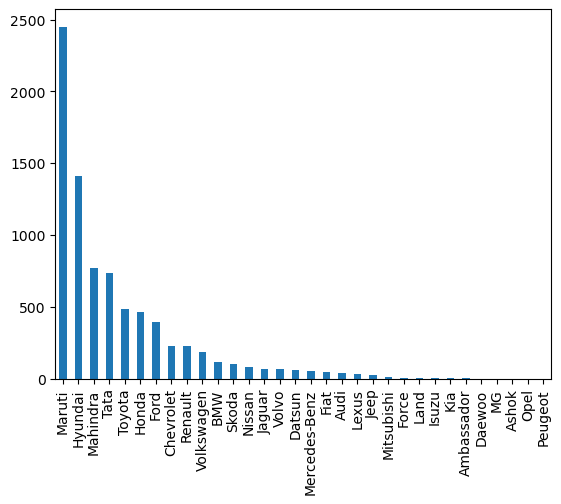

In [61]:
data['brand'].value_counts().plot(kind='bar')

In [69]:
#from statsmodels.graphics.mosaicplot import mosaic
#plt.rcParams['font.size'] = 16.0
#mosaic(data, ['brand']);

In [67]:
#data['brand'].value_counts().plot.pie()

# OneHot encoding using Pandas

In [70]:
# Creating dummy variables for fuel & owner columns
pd.get_dummies(data, columns=["fuel","owner"])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


In [71]:
pd.get_dummies(data, columns=["fuel","owner"]).shape

(8128, 12)

# K-1 OneHot encoding using Pandas

In [74]:
# Creating dummy variables for fuel & owner columns
pd.get_dummies(data, columns=["fuel","owner"], drop_first=True)
# 1st column has removed

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


In [73]:
# Creating dummy variables for fuel & owner columns
pd.get_dummies(data, columns=["fuel","owner"], drop_first=True).shape

(8128, 10)

In [75]:
# We dont use pandas onehot encode in ML models as order gets randomise
# For ML we use Sklearn's class OneHot Encoder

# One Hot Encoding using SKlearn

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["selling_price"],axis = 1),
                                                    data["selling_price"],
                                                   test_size=0.3,
                                                   random_state=101)

In [78]:
X_train.shape

(5689, 4)

In [79]:
X_train.head(2)

,brand,km_driven,fuel,owner
2173,Tata,25000,Petrol,First Owner
1483,Tata,120000,Diesel,First Owner


In [81]:
from sklearn.preprocessing import OneHotEncoder

In [82]:
ohe = OneHotEncoder()

In [83]:
ohe.fit_transform(X_train[["fuel","owner"]])

<5689x9 sparse matrix of type '<class 'numpy.float64'>'
	with 11378 stored elements in Compressed Sparse Row format>

In [85]:
X_train_new = ohe.fit_transform(X_train[["fuel","owner"]]).toarray()
X_test_new = ohe.fit_transform(X_test[["fuel","owner"]]).toarray()

In [87]:
X_train.shape, X_train_new.shape

((5689, 4), (5689, 9))

In [88]:
# Will add brand & KM_driven to converted X_train_new

In [90]:
# Below is an array
X_train[["brand","km_driven"]].values

array([['Tata', 25000],
       ['Tata', 120000],
       ['Maruti', 20000],
       ...,
       ['Maruti', 98000],
       ['Mahindra', 142000],
       ['Maruti', 80000]], dtype=object)

In [91]:
np.hstack((X_train[["brand","km_driven"]].values,X_train_new))

array([['Tata', 25000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Tata', 120000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 20000, 0.0, ..., 0.0, 0.0, 1.0],
       ...,
       ['Maruti', 98000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Mahindra', 142000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 80000, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [97]:
# We we want 1st col to be droped so avoid multicolinearity
ohe = OneHotEncoder(drop="first", sparse=False, dtype = np.int32 )
# Sparse = False will give us an array so we dont have to convert it into an array
# dtype = np.int32 will convert into integer not float i.e. 0.0 -> 0

In [96]:
# Rest is same as above

# OneHot Encoding with Top Categories

In [99]:
counts = data["brand"].value_counts()
counts

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [100]:
data["brand"].nunique()

32

In [101]:
threshold = 100

In [102]:
counts<=threshold

Maruti           False
Hyundai          False
Mahindra         False
Tata             False
Toyota           False
Honda            False
Ford             False
Chevrolet        False
Renault          False
Volkswagen       False
BMW              False
Skoda            False
Nissan            True
Jaguar            True
Volvo             True
Datsun            True
Mercedes-Benz     True
Fiat              True
Audi              True
Lexus             True
Jeep              True
Mitsubishi        True
Force             True
Land              True
Isuzu             True
Kia               True
Ambassador        True
Daewoo            True
MG                True
Ashok             True
Opel              True
Peugeot           True
Name: brand, dtype: bool

In [103]:
counts[counts<=threshold]

Nissan           81
Jaguar           71
Volvo            67
Datsun           65
Mercedes-Benz    54
Fiat             47
Audi             40
Lexus            34
Jeep             31
Mitsubishi       14
Force             6
Land              6
Isuzu             5
Kia               4
Ambassador        4
Daewoo            3
MG                3
Ashok             1
Opel              1
Peugeot           1
Name: brand, dtype: int64

In [104]:
repl = counts[counts<=threshold].index
repl

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object')

In [106]:
pd.get_dummies(data["brand"].replace(repl, "uncommon"))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,1,0,0,0
